# Redes Perceptron de Múltiplas Camadas

* Rede feed-forward
* Treinamento Supervisionado
* Algoritmo Backpropagation

## Modelo de rede

<img src="rede.jpg" style=width:500px;height:400px/>

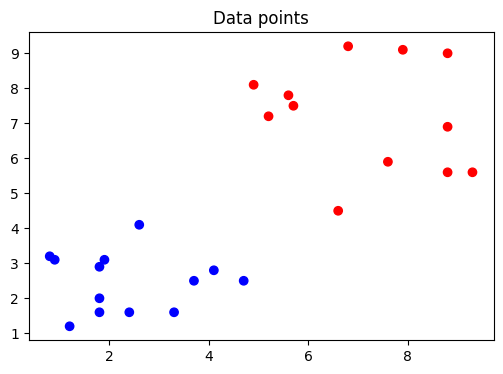

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

import numpy as np
import matplotlib.pyplot as plt

# Dataset
x = np.array([[5.7, 7.5], [9.3, 5.6], [8.8, 6.9], [6.8, 9.2], [7.9, 9.1],
              [8.8, 5.6], [5.6, 7.8], [8.8, 9.0], [7.6, 5.9], [4.9, 8.1],
              [6.6, 4.5], [5.2, 7.2], [1.2, 1.2], [2.4, 1.6], [4.7, 2.5],
              [0.9, 3.1], [2.6, 4.1], [1.8, 2.0], [4.1, 2.8], [1.8, 1.6],
              [1.9, 3.1], [0.8, 3.2], [1.8, 2.9], [3.3, 1.6], [3.7, 2.5]
             ])

d = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[0],
              [0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])

shuffle = np.random.permutation(len(x))
x = x[shuffle]
d = d[shuffle]

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [3]:
class MLP():
    
    def __init__(self, lr, e, neurons):
        """ Construtor """
        # Taxa de aprendizado 
        self.lr = lr
        
        # tolerância
        self.e = e
        
        # Quantidade de neurônios por camadas
        self.neurons = neurons
        
        
    def sigmoid(self, valor):
        '''Calcula a sigmoid de um valor'''
        return (1/(1+math.e**(-valor)))

    def sigmoid_deriv(self, valor):
        '''Calcula a derivada da função sigmoid'''
        sig = self.sigmoid(valor)
        return sig*(1 - sig)

    def activate(self, valor):
        '''Ativa as saídas do neurônio'''
        return self.sigmoid(valor)
    
    def deriv(self, valor):
        '''Calcular a derivada da função de ativação'''
        return self.sigmoid_deriv(valor)

    def evaluate(self, target, predicted):
        '''Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)

    def predict(self, input_data, weights):
        '''Calcula a soma ponderada das entradas pelo peso'''
        return np.dot(input_data, weights).reshape(1, -1)
    
    def train(self, x, d):
        ''' 
        Definir aleatoriamente os pesos, o bias e o peso do bias
        Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.w1 = np.random.random((x.shape[1]+1,self.neurons[0]))
        self.w2 = np.random.random((self.neurons[0], self.neurons[1]))
        self.w3 = np.random.random((self.neurons[1], self.neurons[2]))
        
        epoch = 0
        last_mse = np.inf
        self.total_mse = []
        self.bias = -1
        
        while True:
            mse = 0
            for xi, target in zip(x,d):
                input_value = np.insert(xi, 0, self.bias)
                i1 = self.predict(input_value, self.w1)
                y1 = self.activate(i1)
                i2 = self.predict(y1, self.w2)
                y2 = self.activate(i2)
                i3 = self.predict(y2, self.w3)
                y3 = self.activate(i3)
                current_error = self.evaluate(target, y3)
                mse+=(current_error ** 2)

                delta3 = (target - y3) * self.deriv(i3)
                self.w3 += self.lr * np.dot(y2.T, delta3)

                delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)
                self.w2 += self.lr * np.dot(y1.T, delta2)

                delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)
                self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1)

            mse = mse / len(x)
            
            print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch += 1
        
        
        
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            input_value = np.insert(xi, 0, self.bias)
            i1 = self.predict(input_value, self.w1)
            y1 = self.activate(i1)
            i2 = self.predict(y1, self.w2)
            y2 = self.activate(i2)
            i3 = self.predict(y2, self.w3)
            y3 = self.activate(i3)
            
            results.append(int(np.rint(y3)))
            
        return results
            
    

In [4]:
# Instanciando a rede e treinando-a
rede = MLP(lr = 0.1, e = 1e-6, neurons = [4, 3, 1])
rede.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.3820037]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.3535489]] - |mse_ant - mse|: [[0.0284548]]
EPOCH: 2 - MSE: [[0.32402106]] - |mse_ant - mse|: [[0.02952784]]
EPOCH: 3 - MSE: [[0.29805949]] - |mse_ant - mse|: [[0.02596157]]
EPOCH: 4 - MSE: [[0.27902877]] - |mse_ant - mse|: [[0.01903072]]
EPOCH: 5 - MSE: [[0.26710714]] - |mse_ant - mse|: [[0.01192162]]
EPOCH: 6 - MSE: [[0.26041098]] - |mse_ant - mse|: [[0.00669616]]
EPOCH: 7 - MSE: [[0.25687927]] - |mse_ant - mse|: [[0.00353171]]
EPOCH: 8 - MSE: [[0.25507277]] - |mse_ant - mse|: [[0.0018065]]
EPOCH: 9 - MSE: [[0.2541592]] - |mse_ant - mse|: [[0.00091357]]
EPOCH: 10 - MSE: [[0.25369729]] - |mse_ant - mse|: [[0.00046191]]
EPOCH: 11 - MSE: [[0.25346202]] - |mse_ant - mse|: [[0.00023527]]
EPOCH: 12 - MSE: [[0.25334046]] - |mse_ant - mse|: [[0.00012156]]
EPOCH: 13 - MSE: [[0.25327619]] - |mse_ant - mse|: [[6.42640157e-05]]
EPOCH: 14 - MSE: [[0.25324102]] - |mse_ant - mse|: [[3.51709113e-05]]
EPOCH: 15 - MSE: [[0.253

In [5]:
# Testando os novos valores de pontos
x_teste = np.array([[6, 2], [9, 3], [5, 6], [7, 3], [6, 7], [1, 6]])

teste_resultado = rede.test(x_teste)
teste_resultado

C:\Users\diogoantonio\AppData\Local\Temp\ipykernel_24756\2019237069.py:100: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results.append(int(np.rint(y3)))


[0, 1, 1, 1, 1, 0]

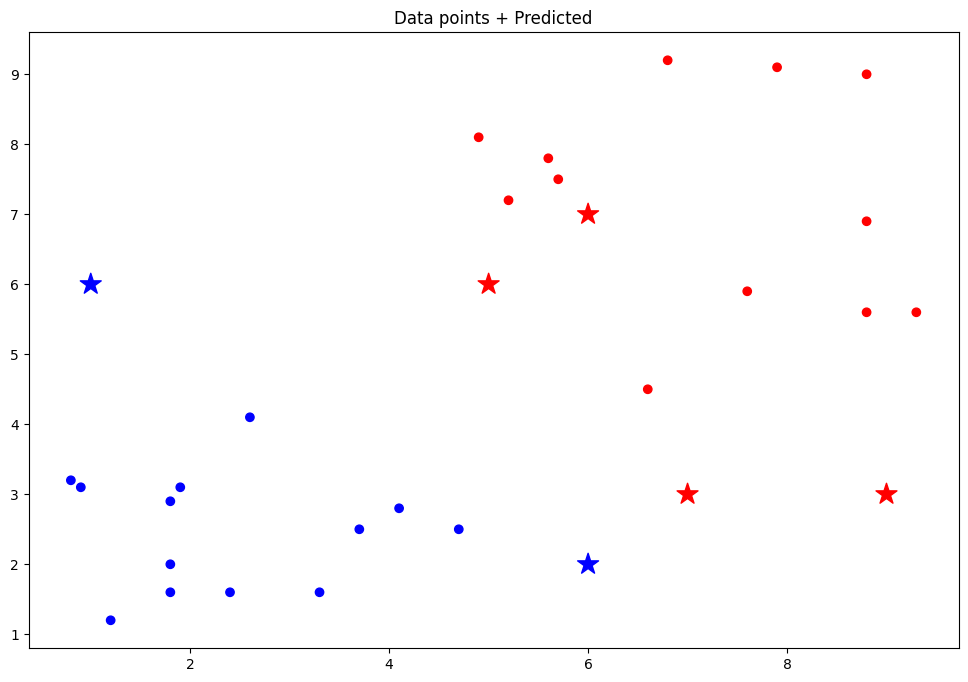

In [6]:
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()